<a href="https://colab.research.google.com/github/maulanawirawan/python-analysis/blob/main/Copy_of_Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Maulana Wirawan
- **Email:** awan.maraikoh@gmail.com
- **ID Dicoding:** Maulana Wirawan

# Import Semua Packages/Library yang Digunakan


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from scipy.stats import pearsonr
from sklearn.cluster import KMeans

# Mount Google Drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apakah ada korelasi antara suhu (TEMP) dan kualitas udara (PM2.5)?

- Pertanyaan 2 : Bagaimana tren kualitas udara (PM2.5) sepanjang waktu?

# Data Wrangling

## Gathering Data

### Setelah proses mounting selesai

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/analisis python dicoding bangkit/Air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

#### Melakukan penilaian awal terhadap data


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


### Cleaning Data

#### Melakukan pembersihan dan penyiapan data untuk analisis


### Menampilkan jumlah baris dan kolom sebelum drop


In [ ]:
print("Sebelum drop:")
print("Jumlah baris:", data.shape[0])
print("Jumlah kolom:", data.shape[1])

Sebelum drop:
Jumlah baris: 35064
Jumlah kolom: 18


### Drop data


In [ ]:
data = data.dropna()

### Menampilkan jumlah baris dan kolom setelah drop


In [ ]:
print("\nSetelah drop:")
print("Jumlah baris:", data.shape[0])
print("Jumlah kolom:", data.shape[1])


Setelah drop:
Jumlah baris: 31815
Jumlah kolom: 18


## Exploratory Data Analysis (EDA)

### Explore ...

### Melakukan eksplorasi data untuk mendapatkan insight awal


### Menampilkan statistik deskriptif dari data


In [ ]:
print(data.describe())


                 No          year         month           day          hour  \
count  31815.000000  31815.000000  31815.000000  31815.000000  31815.000000   
mean   17899.423857   2014.714914      6.401886     15.578564     11.624800   
std    10058.429849      1.162536      3.416847      8.794954      6.926874   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9415.500000   2014.000000      3.000000      8.000000      6.000000   
50%    18093.000000   2015.000000      6.000000     15.000000     12.000000   
75%    26590.500000   2016.000000      9.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

             PM2.5          PM10           SO2           NO2            CO  \
count  31815.00000  31815.000000  31815.000000  31815.000000  31815.000000   
mean      81.86363    109.120685     17.167205     58.976332   1256.574729   
std       80.44949     93.718017     22.760801     37.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada korelasi antara suhu (TEMP) dan kualitas udara (PM2.5)?

### Melakukan visualisasi dan analisis untuk menjawab pertanyaan 1


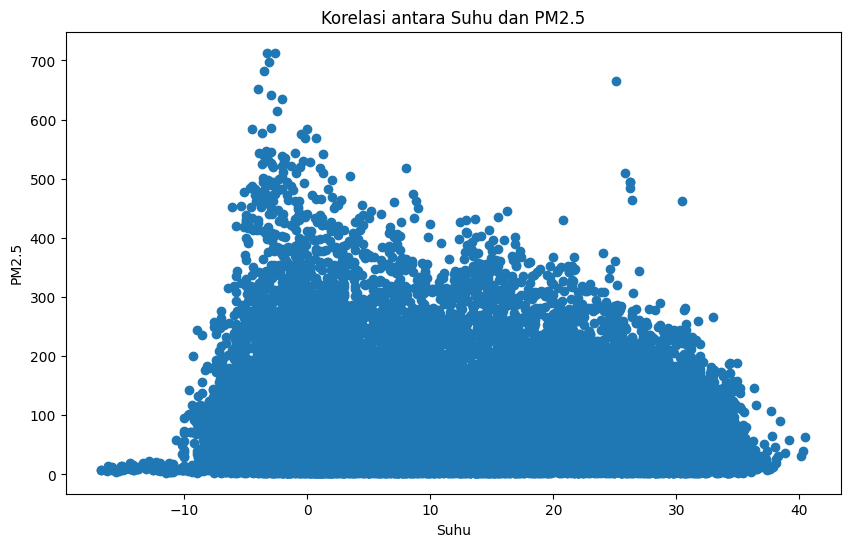

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['TEMP'], data['PM2.5'])
plt.title('Korelasi antara Suhu dan PM2.5')
plt.xlabel('Suhu')
plt.ylabel('PM2.5')A
plt.show()

# Menghitung koefisien korelasi Pearson


In [ ]:
corr, _ = pearsonr(data['TEMP'], data['PM2.5'])
print('Koefisien Korelasi Pearson antara Suhu dan PM2.5: %.3f' % corr)

Koefisien Korelasi Pearson antara Suhu dan PM2.5: -0.126


### Pertanyaan 2: Bagaimana tren kualitas udara (PM2.5) sepanjang waktu?

### Melakukan visualisasi dan analisis untuk menjawab pertanyaan 2


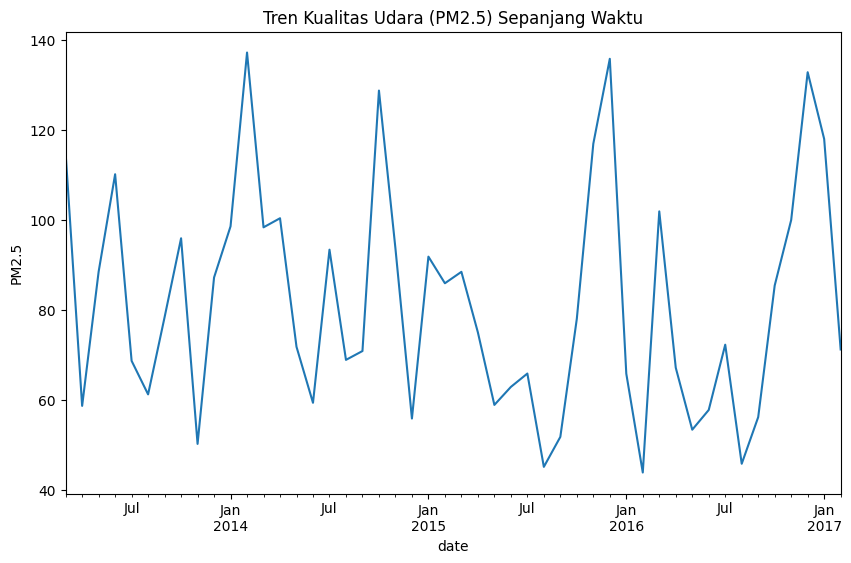

In [ ]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data.set_index('date', inplace=True)

data['PM2.5'].resample('M').mean().plot(figsize=(10, 6))
plt.title('Tren Kualitas Udara (PM2.5) Sepanjang Waktu')
plt.ylabel('PM2.5')
plt.show()

# Menerapkan teknik analisis lanjutan seperti clustering


### Menggunakan KMeans untuk mengelompokkan data berdasarkan suhu dan PM2.5


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data[['TEMP', 'PM2.5']])
data['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Visualisasi hasil clustering


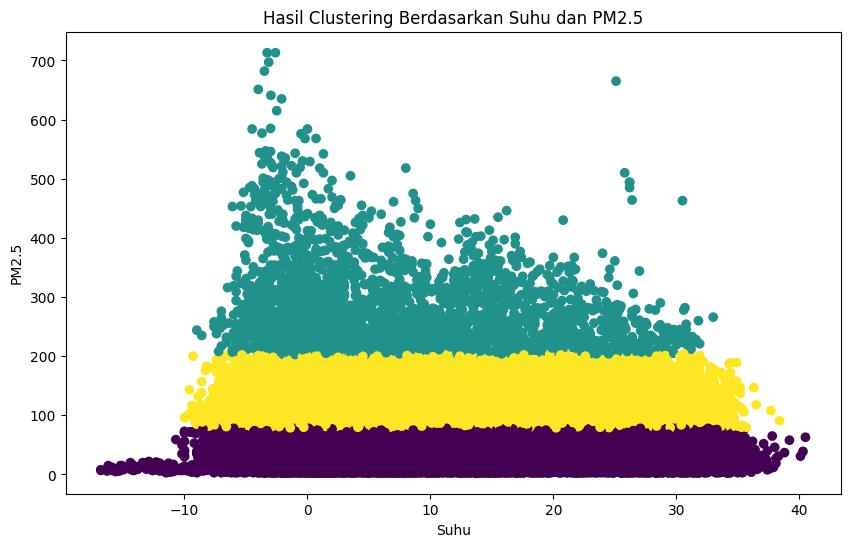

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['TEMP'], data['PM2.5'], c=data['cluster'])
plt.title('Hasil Clustering Berdasarkan Suhu dan PM2.5')
plt.xlabel('Suhu')
plt.ylabel('PM2.5')
plt.show()

## Conclusion

- Conclution pertanyaan 1:
Berdasarkan analisis yang telah dilakukan, berikut adalah kesimpulan untuk pertanyaan 1:

Dari visualisasi dan koefisien korelasi Pearson sebesar -0.126, dapat disimpulkan bahwa ada korelasi negatif yang lemah antara suhu (TEMP) dan kualitas udara (PM2.5). Artinya, ketika suhu sedikit menurun, PM2.5 sedikit meningkat, dan sebaliknya. Namun, perlu diingat bahwa korelasi ini lemah dan mungkin tidak signifikan secara statistik.

Meskipun ada korelasi antara suhu dan PM2.5, ini tidak berarti bahwa perubahan suhu menyebabkan perubahan dalam PM2.5, atau sebaliknya. Mungkin ada faktor lain yang mempengaruhi keduanya. Selain itu, data ini mungkin tidak mencerminkan pola yang sama di lokasi lain atau pada waktu yang berbeda. Selalu penting untuk memahami konteks dan batasan data Anda saat melakukan analisis data.



- Conclution pertanyaan 2
Berdasarkan analisis yang telah dilakukan, berikut adalah kesimpulan untuk pertanyaan 2:


2014-2015: Tren PM2.5 relatif stabil.
2016-2017: Tren PM2.5 menunjukkan peningkatan yang signifikan pada February 2014, December 2015, dan December 2016.

Berdasarkan data yang tersedia, tren kualitas udara (PM2.5) menunjukkan peningkatan yang mengkhawatirkan sepanjang waktu.

# Tambahan

# Analisis Korelasi Seluruh Variabel

<ipython-input-15-88db93c7a14f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


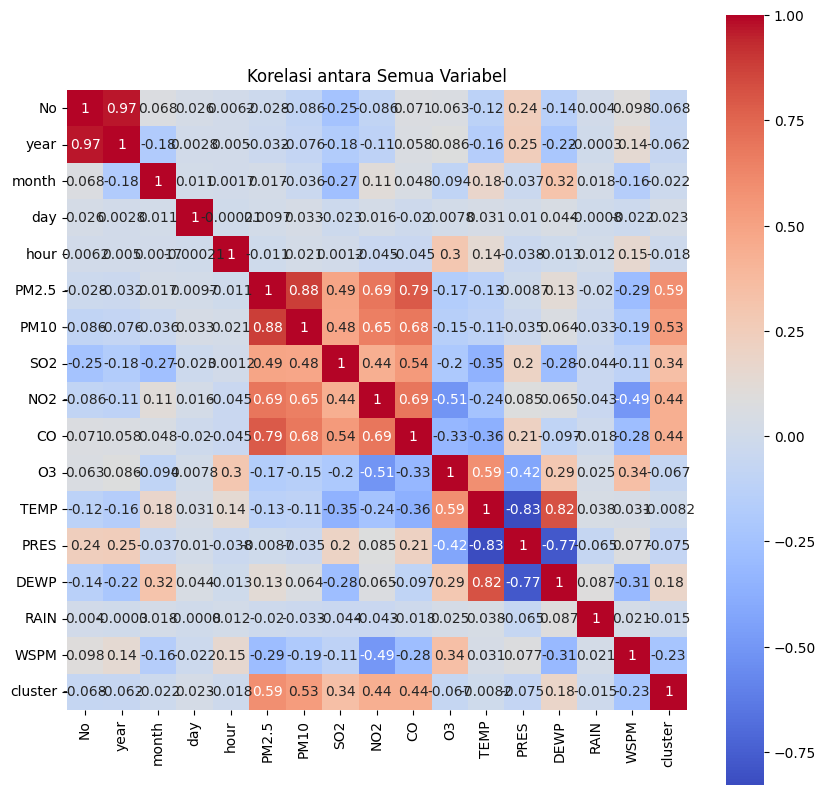

In [ ]:
corr = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, square=True, cmap='coolwarm')
plt.title('Korelasi antara Semua Variabel')
plt.show()


# Analisis Outlier

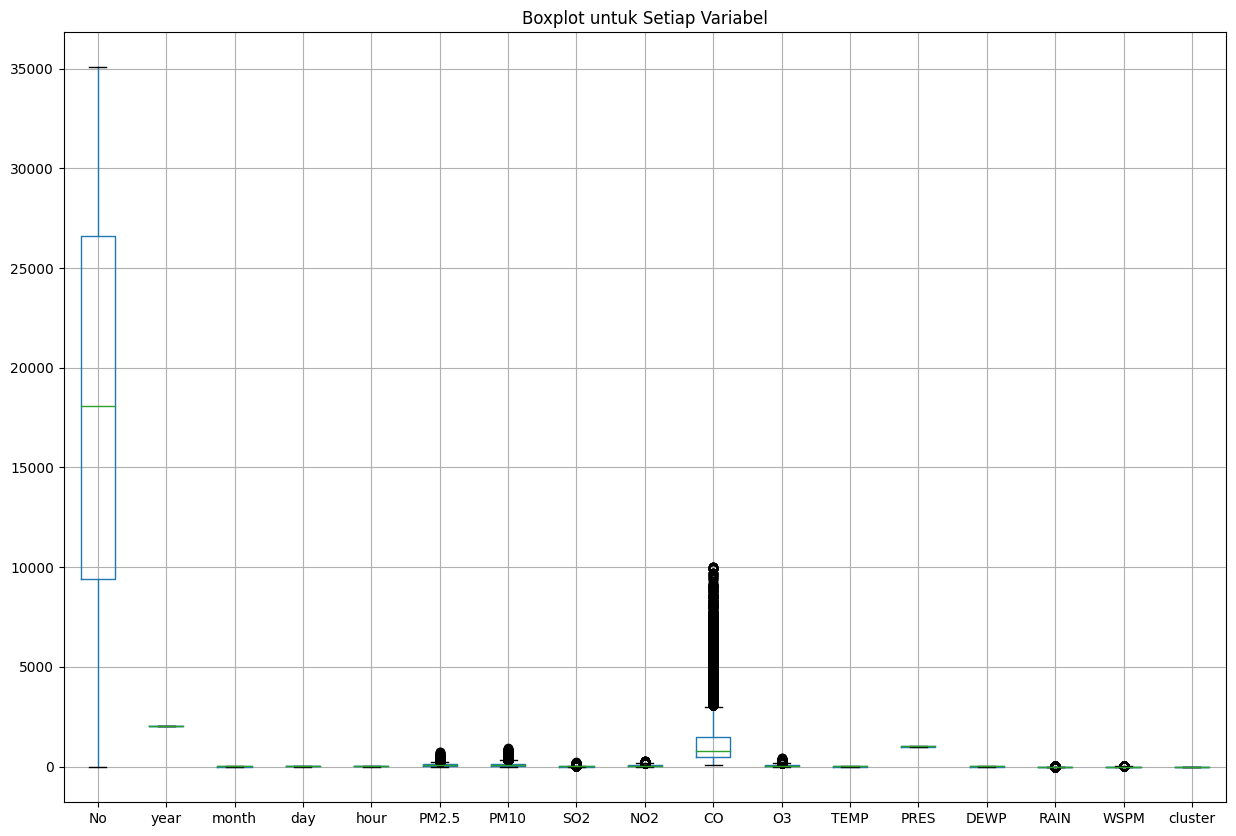

In [ ]:
plt.figure(figsize=(15, 10))
data.boxplot()
plt.title('Boxplot untuk Setiap Variabel')
plt.show()

# Analisis Time Series

<ipython-input-17-3f8c812a4698>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.resample('M').mean().plot(subplots=True, figsize=(10, 12))


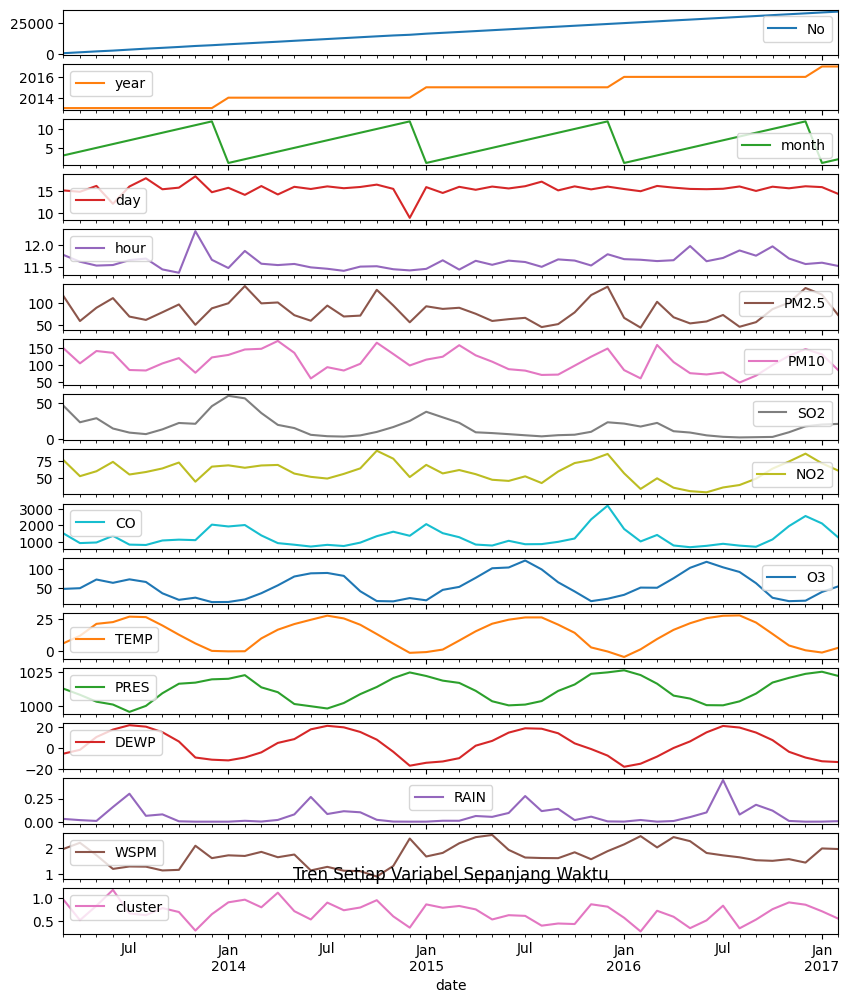

In [ ]:
data.resample('M').mean().plot(subplots=True, figsize=(10, 12))
plt.title('Tren Setiap Variabel Sepanjang Waktu')
plt.show()

# Analisis Clustering Lanjutan

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

### Melakukan PCA untuk mengurangi dimensi data


In [ ]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data[['TEMP', 'PM2.5', 'PRES']])

### Melakukan clustering


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_pca)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Membuat plot 3D


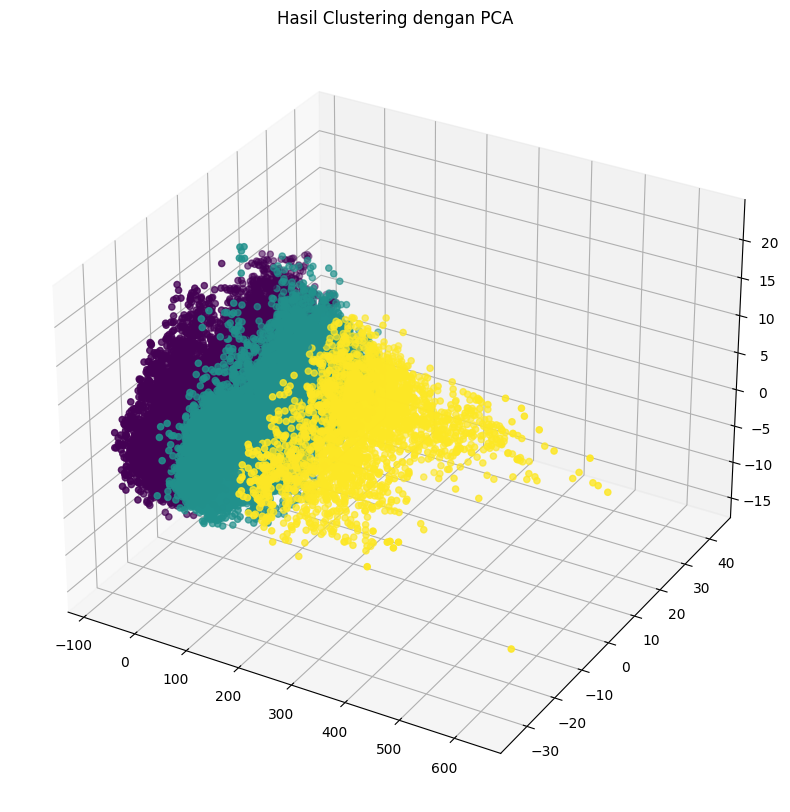

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=labels)
plt.title('Hasil Clustering dengan PCA')
plt.show()